<a href="https://colab.research.google.com/github/chintamaneni11905158/ml/blob/main/ensemble1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping


In [23]:
data=pd.read_csv('mnist_train.csv')
data


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [5]:
x_train.shape, x_test.shape

((48000, 784), (12000, 784))

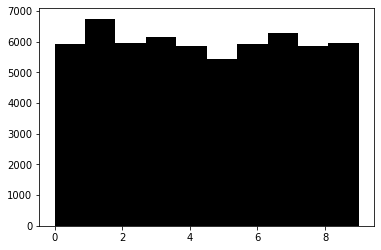

In [53]:
plt.hist(data["label"], color = 'black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


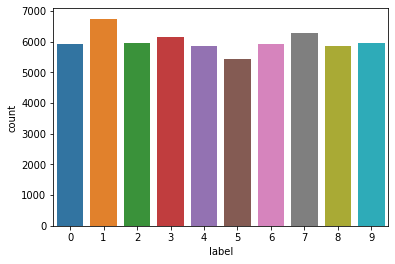

In [24]:
sns.countplot(data["label"])
plt.show()

In [8]:

np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4726, 5400, 4713, 4906, 4716, 4333, 4746, 4985, 4683, 4792]))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1197, 1342, 1245, 1225, 1126, 1088, 1172, 1280, 1168, 1157]))

In [10]:
x_train = x_train/255
x_test = x_test/255

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
20379  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
53032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
27005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
30510  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
508    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
55169  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
49861  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
27063  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
8366   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17530  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

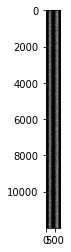

In [60]:

plt.imshow(x_test,cmap='gray')
print(x_train)

In [11]:
knn = KNeighborsClassifier(3) # Define classifier
knn.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy


# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)


Model performance for Training set
- Accuracy: 0.9852708333333333
----------------------------------
Model performance for Test set
- Accuracy: 0.9715833333333334


In [27]:
y_pred = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1189,    0,    1,    0,    0,    1,    4,    0,    0,    2],
       [   0, 1334,    2,    1,    0,    0,    0,    4,    0,    1],
       [   7,    6, 1206,    3,    2,    0,    1,   18,    0,    2],
       [   4,    2,    6, 1185,    0,   12,    0,    6,    5,    5],
       [   2,    6,    0,    0, 1084,    0,    2,    4,    0,   28],
       [   2,    2,    2,   13,    2, 1053,   12,    0,    1,    1],
       [   6,    1,    0,    0,    0,    4, 1161,    0,    0,    0],
       [   2,   15,    1,    0,    4,    1,    0, 1248,    0,    9],
       [   6,   13,    5,   16,    5,   12,    6,    2, 1089,   14],
       [   2,    5,    2,    5,   11,    2,    1,   16,    3, 1110]])

Text(69.0, 0.5, 'Truth')

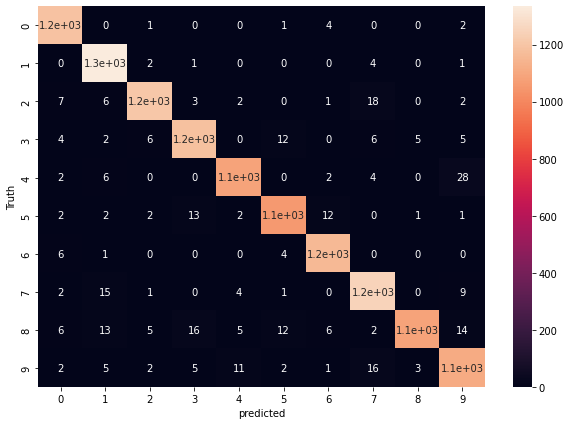

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [16]:
dt = DecisionTreeClassifier(max_depth=20) # Define classifier
dt.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)





Model performance for Training set
- Accuracy: 0.9954583333333333
----------------------------------
Model performance for Test set
- Accuracy: 0.8688333333333333


In [29]:
y_pred = dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1095,    1,   11,   17,    9,   18,   19,    4,   20,    3],
       [   1, 1286,   15,    1,    2,    2,    1,   12,   13,    9],
       [  10,   13, 1071,   32,   16,   14,   15,   30,   35,    9],
       [   9,   11,   33, 1021,    7,   54,   11,   26,   31,   22],
       [   6,    6,   10,   10,  974,   20,   23,   16,   12,   49],
       [  15,   12,   11,   50,   17,  905,   24,    8,   24,   22],
       [  27,    6,   17,    9,   14,   32, 1032,    1,   26,    8],
       [   2,   10,   28,   18,   15,    5,    2, 1156,   10,   34],
       [  16,   19,   20,   45,   30,   37,   19,   12,  925,   45],
       [   8,    7,   11,   24,   54,   23,    5,   36,   28,  961]])

Text(69.0, 0.5, 'Truth')

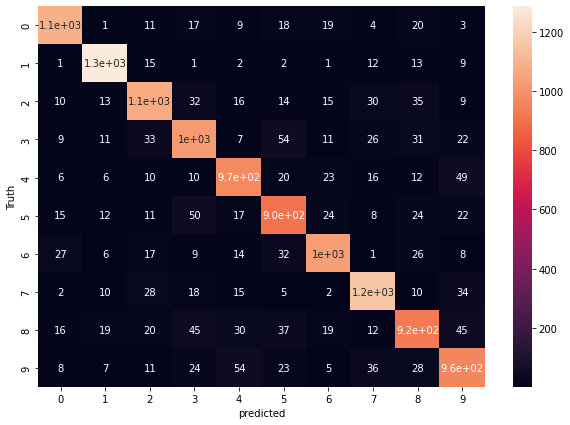

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [18]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train, y_train)

# Make predictions
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy


# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)


Model performance for Training set
- Accuracy: 0.9596041666666667
----------------------------------
Model performance for Test set
- Accuracy: 0.95425


In [32]:
y_pred = mlp.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1177,    1,    0,    0,    3,    2,    6,    1,    6,    1],
       [   0, 1315,    7,    4,    3,    2,    0,    5,    5,    1],
       [   7,    4, 1175,    2,   14,    5,    9,   15,   12,    2],
       [   3,    2,   15, 1148,    0,   31,    1,   12,    5,    8],
       [   0,    7,    6,    1, 1075,    3,   11,    1,    4,   18],
       [   3,    6,    3,    6,    3, 1045,   12,    0,    7,    3],
       [   4,    1,    0,    0,    3,   10, 1151,    0,    3,    0],
       [   3,   12,   10,    4,   10,    0,    1, 1226,    4,   10],
       [   7,   19,    5,   21,    4,   14,   10,    2, 1080,    6],
       [   4,   10,    0,   11,   25,   10,    1,   26,   11, 1059]])

Text(69.0, 0.5, 'Truth')

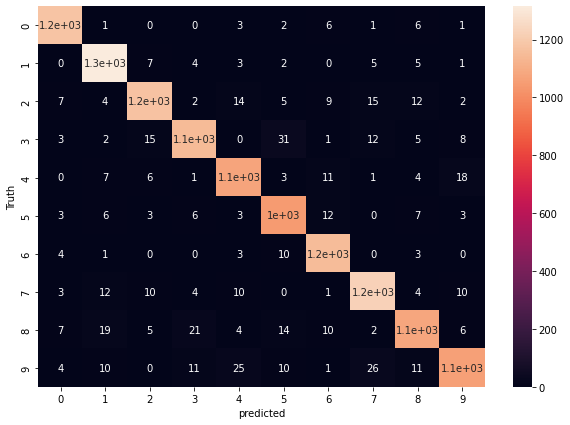

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [17]:
rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy


# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)


Model performance for Training set
- Accuracy: 0.9990625
----------------------------------
Model performance for Test set
- Accuracy: 0.9425


In [34]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1184,    0,    0,    0,    0,    3,    4,    0,    6,    0],
       [   0, 1322,    7,    2,    3,    0,    0,    8,    0,    0],
       [  11,    4, 1177,    9,    6,    3,    5,   16,    8,    6],
       [   5,    3,   21, 1130,    1,   27,    0,   12,   15,   11],
       [   2,    4,    9,    1, 1064,    4,    9,    7,    2,   24],
       [   5,    5,    5,   39,   12,  990,   10,    0,   12,   10],
       [   7,    2,    4,    2,    7,   17, 1130,    0,    3,    0],
       [   4,    7,   17,    6,   10,    1,    0, 1217,    6,   12],
       [   7,   16,   18,   27,   13,   15,    7,    2, 1045,   18],
       [  10,    5,    5,    8,   32,    8,    1,   23,   14, 1051]])

Text(69.0, 0.5, 'Truth')

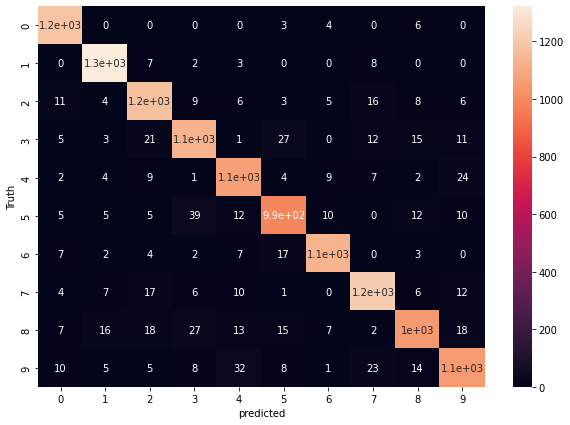

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [31]:
estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy


# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy


print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model performance for Training set
- Accuracy: 0.996875
----------------------------------
Model performance for Test set
- Accuracy: 0.978


In [36]:
y_pred = stack_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1187,    0,    1,    0,    0,    1,    5,    0,    1,    2],
       [   0, 1324,    5,    2,    2,    0,    0,    8,    0,    1],
       [   5,    3, 1218,    3,    1,    0,    0,   13,    0,    2],
       [   1,    1,    2, 1195,    0,    9,    0,    3,    9,    5],
       [   1,    2,    1,    0, 1099,    0,    3,    3,    0,   17],
       [   1,    2,    1,   11,    0, 1055,   10,    0,    4,    4],
       [   4,    0,    0,    0,    0,    3, 1162,    0,    3,    0],
       [   2,    7,    2,    1,    3,    1,    0, 1253,    1,   10],
       [   2,    6,    5,    9,    2,    5,    3,    0, 1125,   11],
       [   1,    4,    1,    3,    9,    0,    1,   13,    7, 1118]])

Text(69.0, 0.5, 'Truth')

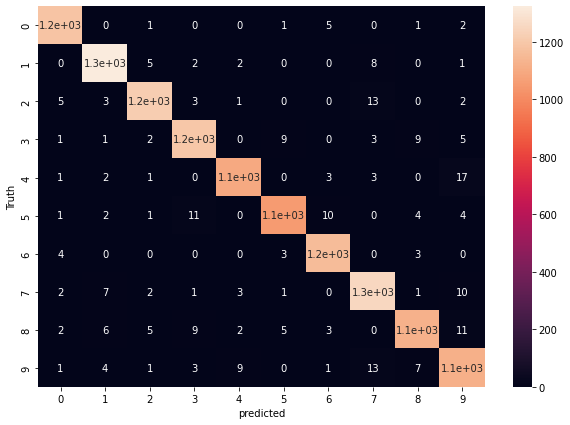

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [38]:
acc_train_list = {'knn':knn_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}


In [39]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])

df = pd.concat([acc_df], axis=1)
df

,Accuracy
knn,0.985271
dt,0.995458
rf,0.999062
mlp,0.959604
stack,0.996875


In [40]:
acc_test_list = {'knn':knn_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_model_test_accuracy}

In [62]:
acc_df1 = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])

df1 = pd.concat([acc_df1], axis=1)
df1

,Accuracy
knn,0.971583
dt,0.868833
rf,0.942500
mlp,0.954250
stack,0.978000


In [64]:
df.to_csv('results.csv')

In [63]:
df1.to_csv('results1.csv')